## Load dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import photofitness
from photofitness import display
from photofitness.analysis import quantify_peaks
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load UV mitosis data:
folder = "/Users/esti/Documents/PROYECTOS/PHX/DOCS/MANUSCRIPT/CODE/"
path_data = os.path.join(folder, "data/mitosis_CHO_UV_clean.csv")
data = pd.read_csv(path_data)
print(len(data))

95348


## Estimation of cell densities for each field of view

Each well is 9.3 X 8.7 mm. Each FOV (the one in the final images) is 660 X 660 microns

- Area of each well: 80.91 mm^2
- Area of each FOV: 0.4356 mm ^2
- Total # of cells per well: 40000 per well
- Total# of cells per FOV: 215.35


In [3]:
well_area = 80.91
cell_density = 25000
fov_area = 660
fov_mm = (fov_area*0.001)**2
cell_mm = cell_density / well_area
cell_fov = cell_mm * fov_mm
print(cell_fov)

134.59399332591772


/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_93814/726358216.py:36: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=plot_y_var, hue=condition, data=ploting_data,
/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_93814/726358216.py:36: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=plot_y_var, hue=condition, data=ploting_data,


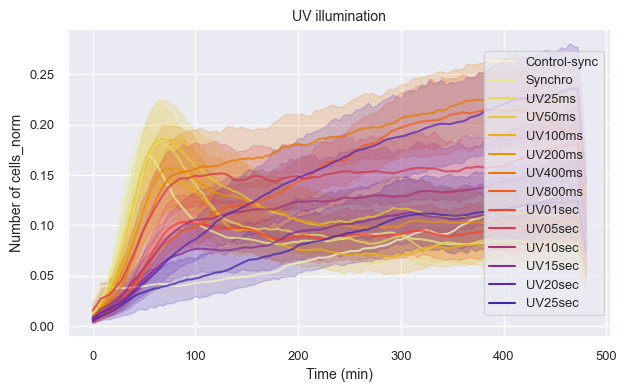

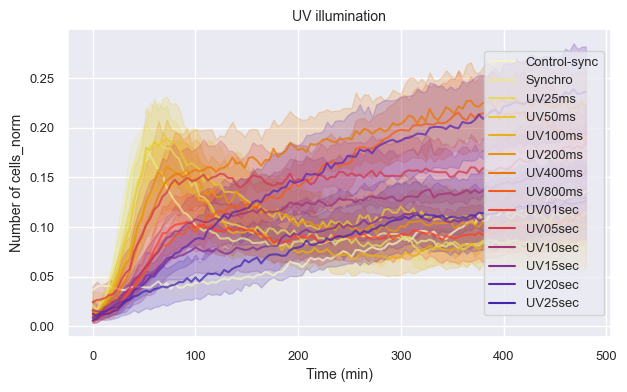

In [4]:
## Rename the columns to get the proper naming of the axis
data = data.rename(columns={'mitosis': 'Number of cells', 
                            'mitosis_normalised': 'Norm. Number of cells'})
## Choose a path to store the data:
output_path = folder 
## There is raw and smooth data. We show the smooth data (with a moving average of kernel 5) for the plots.
groups = np.unique(data["processing"])
## name of the variable to display in the plot.
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var
format_extension = 'pdf'

for g in groups:
    ploting_data = data[data["processing"]==g].reset_index(drop=True)
    title = "UV illumination"
    condition = "Subcategory-02"
    name = "{0}_{1}.{2}".format(plot_y_var, g, format_extension) # name we want to give to the plot
    hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
                 'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec']
    #display.plot_conditions(ploting_data, plot_y_var, title, condition, output_path, name,
    #                style_condition="processing", hue_order=hue_order)
    #
    
    fig = plt.figure(figsize=(7, 4))
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=0.85)
    # Plot the results per category
    sns.lineplot(x="frame", y=plot_y_var, hue=condition, data=ploting_data,
                 palette=sns.color_palette("CMRmap_r", 17), linewidth=1.5, 
                 alpha=0.75, hue_order=hue_order)
    # plt.ylabel(y_label)
    plt.xlabel("Time (min)")
    plt.yscale("linear")
    plt.legend(loc='right')
    plt.title(title)
    format_extension = name.split(".")[-1]
    format_extension = 'pdf'
    name = "{0}_{1}.{2}".format(plot_y_var, g, format_extension)
    fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
    format_extension = 'png'
    name = "{0}_{1}.{2}".format(plot_y_var, g, format_extension)
    fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)    


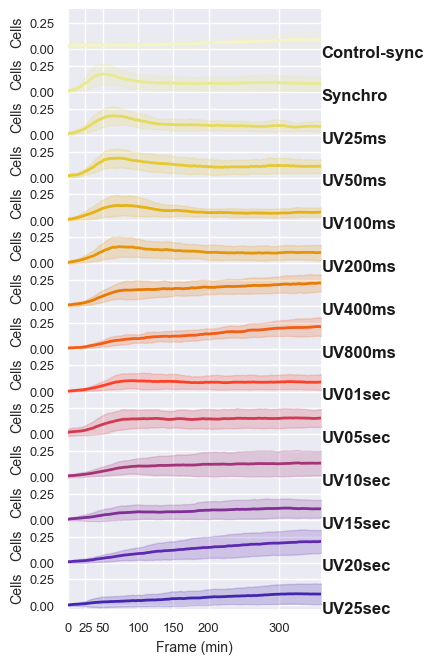

In [5]:
## Order the data for the plot
hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
             'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 
ordered_dataset = None
for h in hue_order:
    aux = data[data["Subcategory-02"]==h].reset_index(drop=True)
    if ordered_dataset is None:
        ordered_dataset = aux
    else:
        ordered_dataset = pd.concat([ordered_dataset, aux])
# Initialize the FacetGrid object
pal = sns.color_palette("CMRmap_r", 17)
g = sns.FacetGrid(ordered_dataset, row="Subcategory-02", hue="Subcategory-02",
                  aspect=9, height=0.5, palette=pal, hue_order=hue_order, sharex=True)
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=1)
# Draw the densities in a few steps
g.map(sns.lineplot, "frame", plot_y_var, hue_order=hue_order, alpha=1, linewidth=2, errorbar="sd")
# passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=0.5, linestyle="-", color=None, clip_on=True)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(1,0, label, fontweight="bold", color="k",
            ha="left", va="center", transform=ax.transAxes)
g.map(label, plot_y_var)

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.02)
# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(ylabel="Cells", xlabel="Frame (min)", xticks=[0, 25, 50, 100, 150, 200, 300], xlim=[0, 360])
g.despine(bottom=True, left=True)

format_extension = 'png'
name = "{0}.{1}".format(plot_y_var, format_extension) # name we want to give to the plot
new_name="cells_vertical_subplots_{}".format(name)
g.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
format_extension = 'pdf'
name = "{0}.{1}".format(plot_y_var, format_extension) # name we want to give to the plot
new_name="cells_vertical_subplots_{}".format(name)
g.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

## Plot peak data

### Calculate the mitosis peaks for each video

In [6]:
y_var = "Number of cells" # "Norm. Number of cells"
cell_fov = 134.59
norm = True 
if norm is True:
    data[y_var + '_norm'] = data[y_var]/cell_fov
    plot_y_var = y_var + '_norm'
else:
    plot_y_var = y_var
    
# Integrate the information about the temporal peaks of mitosis
data_peaks = quantify_peaks(data, plot_y_var)

### Display the peak information for each condition

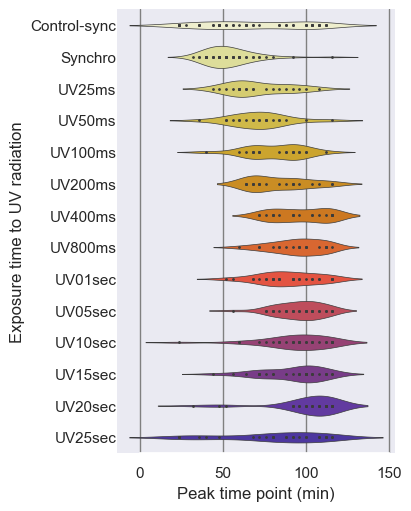

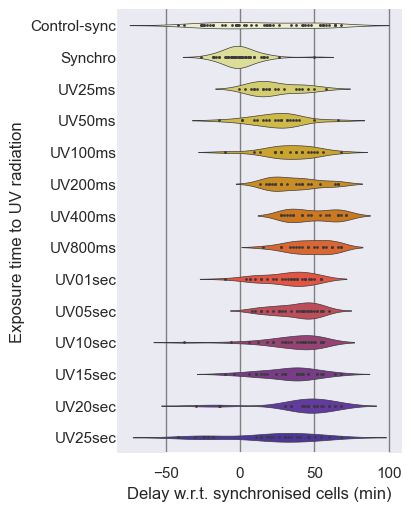

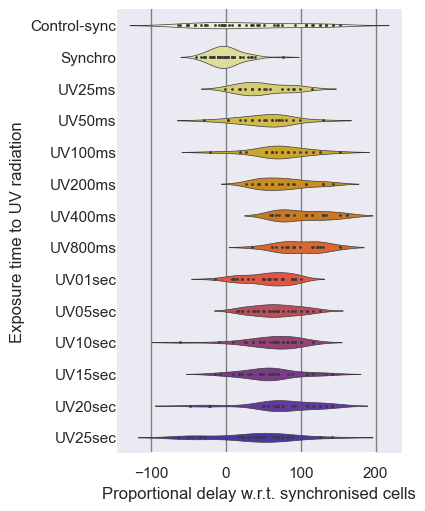

In [7]:
#### Show each distribution with both violins and points

hue_order = ['Control-sync', 'Synchro', 'UV25ms', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms',
             'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 

## Rename the columns to get the proper naming in the plots
data_peaks = data_peaks.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells"]

for x in x_var:
    f, ax = plt.subplots(figsize=(4, 5), constrained_layout=True)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=1)
    ax.yaxis.set_tick_params(pad=-6) 
    sns.violinplot(data=data_peaks, palette=sns.color_palette("CMRmap_r", 17),  #palette=sns.color_palette("husl", 14), 
                   inner="points", order=hue_order,
                   hue_order=hue_order, bw=.5, orient="h", 
                   y="Subcategory-02", 
                   x=x, width=0.7, linewidth=0.5)

    # Tweak the visual presentation
    ax.xaxis.grid(True, color="gray")

    ax.set(ylabel="Exposure time to UV radiation")
    ax.set(xlabel=x)
    sns.despine(trim=True, left=True)

    format_extension = 'png'
    name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
    format_extension = 'pdf'
    name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)


## Display cell growth after mitosis

/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_93814/2551416489.py:21: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=dynamics_metrics,


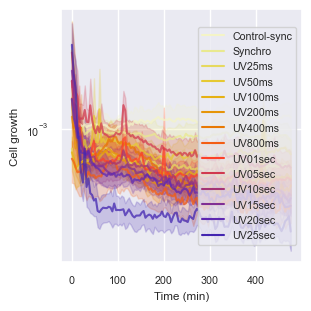

In [8]:
## Path to the cell growth data:
# Load UV mitosis data:
path_growth_data = os.path.join(folder, "data/dynamics_intensity_WL UV - high density.csv")
dynamics_metrics = pd.read_csv(path_growth_data)
dynamics_metrics = dynamics_metrics.rename(columns={'time_variance': 'Cell growth'})
y_var = "Cell growth"
format_extension = 'pdf'
name = "cell_growth.{}".format(format_extension)

# display.plot_mitosis(dynamics_metrics, output_path, hue_order, y_var, graph_format=format_extension)
#display.plot_conditions(dynamics_metrics, y_var, "Cell growth after mitosis", "Subcategory-02", 
#                        output_path, name, style_condition="Subcategory-01", hue_order=hue_order)


fig = plt.figure(figsize=(3,3), constrained_layout=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=0.7)
# Plot the results per category
sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=dynamics_metrics,
             palette=sns.color_palette("CMRmap_r", 17), linewidth=1.5, 
             alpha=0.75, hue_order=hue_order)
# plt.ylabel(y_label)
plt.xlabel("Time (min)")
plt.yscale("log")
plt.legend(loc='right')
format_extension = name.split(".")[-1]
format_extension = 'pdf'
name = "cell_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
format_extension = 'png'
name = "cell_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)


### Analysis of the cell growth after the peak in mitosis
We will average the dynamics and compute the cummulative sum after mitosis to estimate the dynamics of the daughter cells growing

In [9]:
# We will compute it for each video. Videos are uniquely defined by concatenating the date and the video name

# Initialise the parameters
c = "WL UV - high density"
dynamics_metrics["Cummulative cell growth"] = 0
motility = []

# Cover each folder and each video to process each independent acquisition
for f in np.unique(data_peaks["Subcategory-00"]):
    # Create a new data set to filter the experimental replica.
    data_cf = data_peaks[data_peaks["Subcategory-00"]==f].reset_index(drop=True)
    dynamics_metrics_f = dynamics_metrics[dynamics_metrics["Subcategory-00"]==f]
    
    # Process each video acquired on the day f
    for v in np.unique(data_cf["video_name"]):
        dynamics_metrics_fv = dynamics_metrics_f[dynamics_metrics_f["video_name"] == v]
        
        # Recover the time point at which the peak is achieved
        data_cfv = data_cf[data_cf["video_name"] == v].reset_index(drop=True)
        peak = data_cfv["Peak time point (min)"].iloc[0]
    
        # Compute the cummulative cell growth only after the mitosis
        after_aux = dynamics_metrics_fv[dynamics_metrics_fv["frame"]>peak]
        index = after_aux.index.to_list()
        dynamics_metrics.loc[index, ["Cummulative cell growth"]] = after_aux["Cell growth"].cumsum()   
        # Average the cell growth
        mean_dynamics = np.mean(after_aux["Cell growth"])
        
        motility.append([peak, mean_dynamics, f, v, c, dynamics_metrics_fv["Subcategory-02"].iloc[0]])
        
motility_dataframe = pd.DataFrame(motility, columns=['peak', 'Mean growth dynamics', 'Subcategory-00',
                                                     "video_name", 'Subcategory-01', "Subcategory-02"])

#### Display the cummulative results

/var/folders/2m/yqllfkcd3gs5_3tz_4m5h85m0000gp/T/ipykernel_93814/4032111833.py:14: UserWarning: The palette list has more values (17) than needed (14), which may not be intended.
  sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=dynamics_metrics,


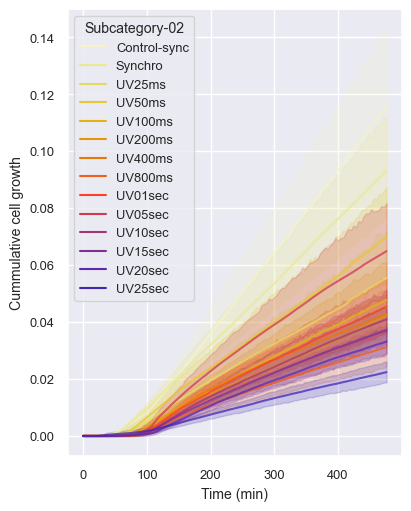

In [10]:
y_var = "Cummulative cell growth"
format_extension = 'pdf'
name = "cell_cummulative_growth.{}".format(format_extension)

#display.plot_conditions(dynamics_metrics, y_var, "Cummulative cell growth after mitosis", "Subcategory-02", 
#                        output_path, name, style_condition="Subcategory-01", hue_order=hue_order)

fig = plt.figure(figsize=(4, 5), constrained_layout=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=0.85)
# Plot the results per category
sns.lineplot(x="frame", y=y_var, hue="Subcategory-02", data=dynamics_metrics,
             palette=sns.color_palette("CMRmap_r", 17), linewidth=1.5, alpha=0.75, hue_order=hue_order)
# plt.ylabel(y_label)
plt.xlabel("Time (min)")
plt.yscale("linear")
#plt.legend(loc='upper right')
format_extension = name.split(".")[-1]
format_extension = 'pdf'
name = "cell_cummulative_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)
format_extension = 'png'
name = "cell_cummulative_growth.{}".format(format_extension)
fig.savefig(os.path.join(output_path, name), format=format_extension, transparent=True)


#### Display the violin plots of the averaged cell growth vertically distributed

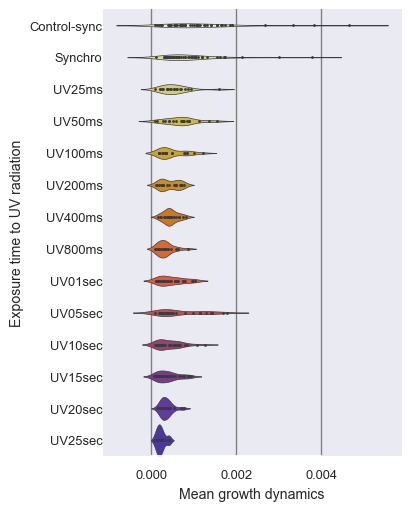

In [11]:
x = 'Mean growth dynamics'
f, ax = plt.subplots(figsize=(4, 5), constrained_layout=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.plotting_context("paper")
sns.set_theme(style="ticks", rc=custom_params)
sns.set(font_scale=1)
ax.yaxis.set_tick_params(pad=-6) 
sns.violinplot(data=motility_dataframe, palette=sns.color_palette("CMRmap_r", 17), 
               inner="points", order=hue_order,
               hue_order=hue_order, bw=.5, orient="h", 
               y="Subcategory-02", 
               x=x, width=1, linewidth=0.5)

# Tweak the visual presentation
ax.xaxis.grid(True, color="gray")

ax.set(ylabel="Exposure time to UV radiation")
ax.set(xlabel=x)
sns.despine(trim=True, left=True)

format_extension = 'png'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="peaktime_violin_horizontal_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
format_extension = 'pdf'
name = "{0}.{1}".format(x, format_extension) # name we want to give to the plot
new_name="peaktime_violin_horizontal_{}".format(name)
f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)

## Plot the results for different wavelengths

In [12]:
wl = ["UV", "475", "568", "630"]
data = None
for w in wl:
    new_data = pd.read_csv(os.path.join(folder, "data/mitosis_CHO_{}_clean.csv".format(w)))
    ## Rename the columns to get the proper naming of the axis
    new_data = new_data.rename(columns={'mitosis': 'Number of cells', 
                                'mitosis_normalised': 'Norm. Number of cells'})
    data_peaks = quantify_peaks(new_data, 'Number of cells')
    if data is None:
        data = data_peaks
    else:
        data = pd.concat([data, data_peaks]).reset_index(drop=True)
# Integrate the information about the temporal peaks of mitosis


In [13]:
np.unique(data["Subcategory-01"])

array(['WL 475 - high density', 'WL 568 - high density',
       'WL 630 - high density', 'WL UV - high density'], dtype=object)

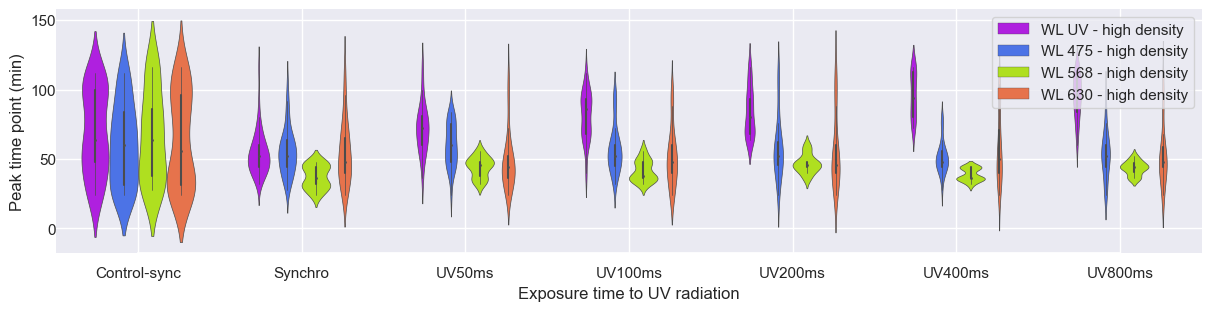

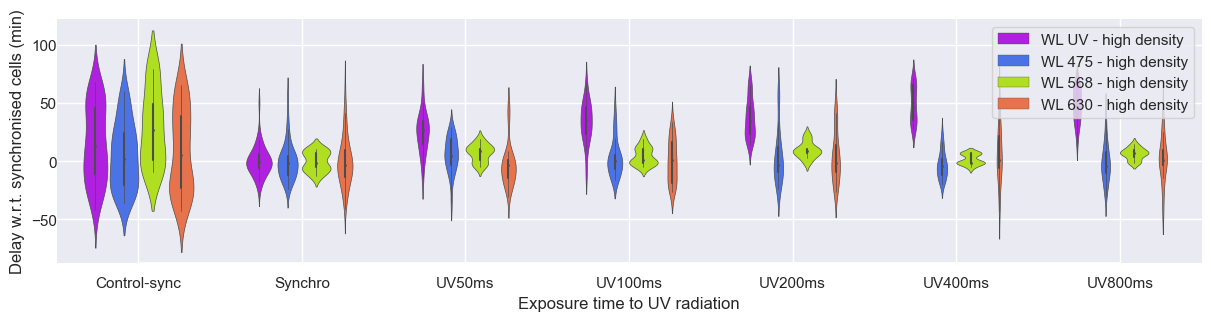

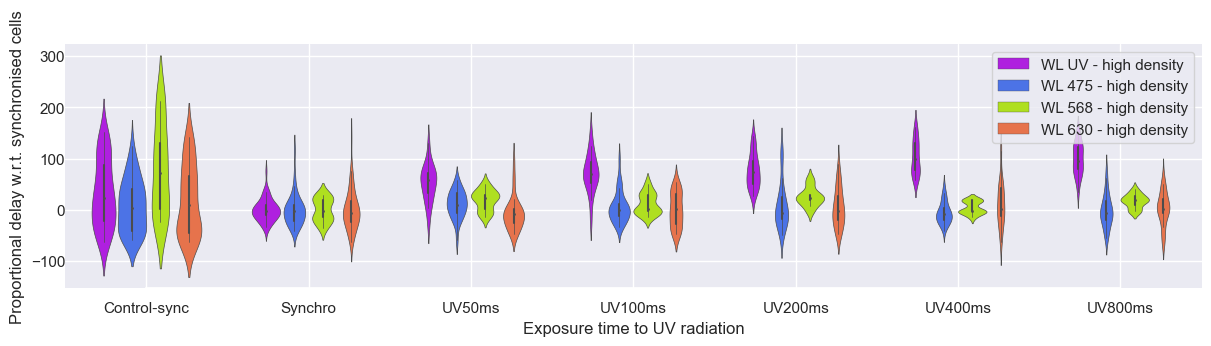

In [20]:
#### Show each distribution with both violins and points
wl=[ 'WL UV - high density', 'WL 475 - high density', 'WL 568 - high density','WL 630 - high density']
hue_order = ['Control-sync', 'Synchro', 'UV50ms', 'UV100ms', 'UV200ms', 'UV400ms', 'UV800ms']
             #'UV01sec', 'UV05sec', 'UV10sec', 'UV15sec', 'UV20sec', 'UV25sec'] 

## Rename the columns to get the proper naming in the plots
data = data.rename(columns={'peak_time': 'Peak time point (min)', 
                            'delay_synchro': 'Delay w.r.t. synchronised cells (min)',
                           'proportional_delay_synchro': 'Proportional delay w.r.t. synchronised cells'})

x_var = ["Peak time point (min)", "Delay w.r.t. synchronised cells (min)",
         "Proportional delay w.r.t. synchronised cells"]

# Create an array with the colors you want to use
colors = [ "#bf00ff", "#3366ff", "#bfff00", "#ff6633"]# Set your custom color palette
palette = sns.color_palette(colors)

for x in x_var:
    f, ax = plt.subplots(figsize=(12, 3), constrained_layout=True)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.plotting_context("paper")
    sns.set_theme(style="ticks", rc=custom_params)
    sns.set(font_scale=1)
    ax.yaxis.set_tick_params(pad=-6) 
    sns.violinplot(data=data, palette=palette,  #palette=sns.color_palette("husl", 14), 
                   bw=.5, orient="v", order=hue_order, hue_order=wl,
                   x="Subcategory-02", hue="Subcategory-01", alpha=1,
                   y=x, width=0.7, linewidth=0.5)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    plt.legend(loc="upper right")
    ax.set(xlabel="Exposure time to UV radiation")
    ax.set(ylabel=x)
    sns.despine(trim=True, left=True)

    format_extension = 'png'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True, dpi=300)
    format_extension = 'pdf'
    name = "{0}_wl.{1}".format(x, format_extension) # name we want to give to the plot
    new_name="peaktime_violin_horizontal_{}".format(name)
    f.savefig(os.path.join(output_path, new_name), format=format_extension, transparent=True,dpi=300)
